# Sample Python code to plot GCHP data

In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cubedsphere as cs  # https://github.com/JiaweiZhuang/cubedsphere

In [2]:
ls ~/tutorial/gchp_standard/OutputDir/

FILLER
GCHP.SpeciesConc_avg.20160701_0030z.nc4
GCHP.SpeciesConc_inst.20160701_0100z.nc4


In [3]:
ds = xr.open_dataset("~/tutorial/gchp_standard/OutputDir/GCHP.SpeciesConc_inst.20160701_0100z.nc4")
ds['SpeciesConc_O3']

<xarray.DataArray 'SpeciesConc_O3' (time: 1, lev: 72, lat: 144, lon: 24)>
[248832 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 20.0 21.0 22.0 23.0 24.0
  * lat      (lat) float64 1.0 2.0 3.0 4.0 5.0 ... 140.0 141.0 142.0 143.0 144.0
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 68.0 69.0 70.0 71.0 72.0
  * time     (time) datetime64[ns] 2016-07-01T01:00:00
Attributes:
    long_name:       Dry mixing ratio of species for O3
    units:           mol mol-1 dry
    fmissing_value:  1000000000000000.0
    standard_name:   Dry mixing ratio of species for O3
    vmin:            -1000000000000000.0
    vmax:            1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

In [4]:
# get data at one level and reshape to 6 cubed-sphere panels
data = ds['SpeciesConc_O3'].isel(time=0, lev=0).data.reshape(6, 24, 24)

In [5]:
grid = cs.csgrid_GMAO(24)  # compute cubed-sphere coordinate values needed for plotting

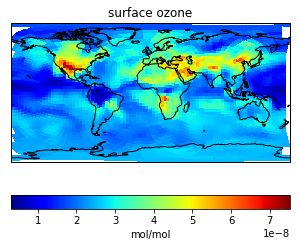

In [6]:
fig = plt.figure(figsize=[5, 4])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

im = cs.plotCS_quick_raw(grid['lon_b'], grid['lat_b'],
                    data, grid['lon'], ax, cmap='jet', masksize=4)
cbar = fig.colorbar(im, orientation='horizontal')
cbar.set_label('mol/mol')

plt.title('surface ozone');